## Tutorial 6. Create hypsometric curves


In this tutorial we will extract hipsometric curves and their metrics for all the basins of tutorial 1. We will use the class HCurve from landspy. 

>- `HCurve(dem, basin, bid=1, name="")`
    - `dem` (*landspy.DEM*, *landspy.Basin*, *str*) DEM, Basin instance or path to a previous saved hypsometric Curve. If it's a Basin or a string, the rest of the arguments will be ignored.
    - `basin` (None, str, Grid). Drainage basin. If dem is a Basin or a str, this argument is ignored. Needs to have the same dimensions and cellsize than the input DEM.
    - `bid` (int) Id of the basin in the basingrid object
    - `name` (str) Name of the basin (optional)


### 1. Load a DEM and a basins raster

To load a **DEM** we will use the class DEM, for a raster we will use the class **Grid**

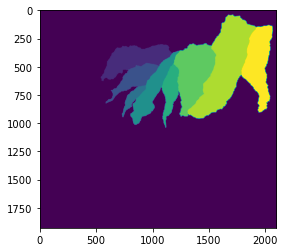

In [1]:
from landspy import DEM, Grid

# Load Network and basins from tutorial 1.
dem = DEM("data/guadalfeo25.tif")
basins = Grid("data/basins.tif")
basins.plot()

### 2. Create Hypsometric curves and get metrics

To create a Hypsometric Curve we can use the class HCurve.
Once created, we can access to curve metrics with the following methods:
- `HCurve.getName()` >> Get the name (label) of the Hypsometric curve
- `Channel.getHI()` >> Get the value of the Hypsometric Integral of the curve
- `Channel.getKurtosis()` >> Get the value of the Kurtosis of the curve
- `Channel.getSkewness()` >> Get the value of the Skewness of the curve
- `Channel.getDensityKurtosis()` >> Get the value of the Kurtosis of the density function of the curve
- `Channel.getDensitySkewness()` >> Get the value of the Skewness of the density function of the curve

In [2]:
from landspy import HCurve
import matplotlib.pyplot as plt

# We will use the basin names
idnames = [(1, "Durcal"), (2, "Torrente"), (3, "Tablate"), (4, "Lanjaron"),
          (5, "Chico"), (6, "Poqueira"), (7, "Trevelez"), (8, "Guadalfeo")]

curvas = []
for idx in idnames:
    # Create the curve
    curva = HCurve(dem, basins, bid=idx[0], name=idx[1])
    # Append to curvas list
    curvas.append(curva)
    # Get name and some metrics
    name = curva.getName()
    HI = curva.getHI()
    KU = curva.getKurtosis()
    SK = curva.getSkewness()
    DKU = curva.getDensityKurtosis()
    DSK = curva.getDensitySkewness()
    # Plot curve name and metrics
    print("{}:: HI: {:.3f}, KU: {:.3f}, SK: {:.3f}, DKU: {:.3f}, DSK: {:.3f}".format(name, HI, KU, SK, DKU, DSK))
    print()



Durcal:: HI: 0.429, KU: 0.572, SK: 2.324, DKU: 0.235, DSK: 1.652

Torrente:: HI: 0.470, KU: 0.485, SK: 2.233, DKU: -0.084, DSK: 1.649

Tablate:: HI: 0.459, KU: 0.541, SK: 2.262, DKU: 0.251, DSK: 1.651

Lanjaron:: HI: 0.508, KU: 0.551, SK: 2.374, DKU: -0.033, DSK: 1.824

Chico:: HI: 0.538, KU: 0.404, SK: 2.129, DKU: -0.324, DSK: 1.718

Poqueira:: HI: 0.565, KU: 0.346, SK: 2.035, DKU: -0.247, DSK: 1.601

Trevelez:: HI: 0.532, KU: 0.428, SK: 2.141, DKU: -0.117, DSK: 1.719

Guadalfeo:: HI: 0.538, KU: 0.433, SK: 2.168, DKU: -0.264, DSK: 1.711



### 3. Plot hypsometric curves

We can plot the hipsometric curve with its `.plot(ax)` method. This method accept any keyword argument accepted by matplotlib.pyplot.plot(). We can pass an Axe as argument or leave it None (in this case a new Figure and Axe will be created).
Also, we can obtain the relative area and elevation values with the methods `HCurve.getA()` and `HCurve.getH()`and plot them. 



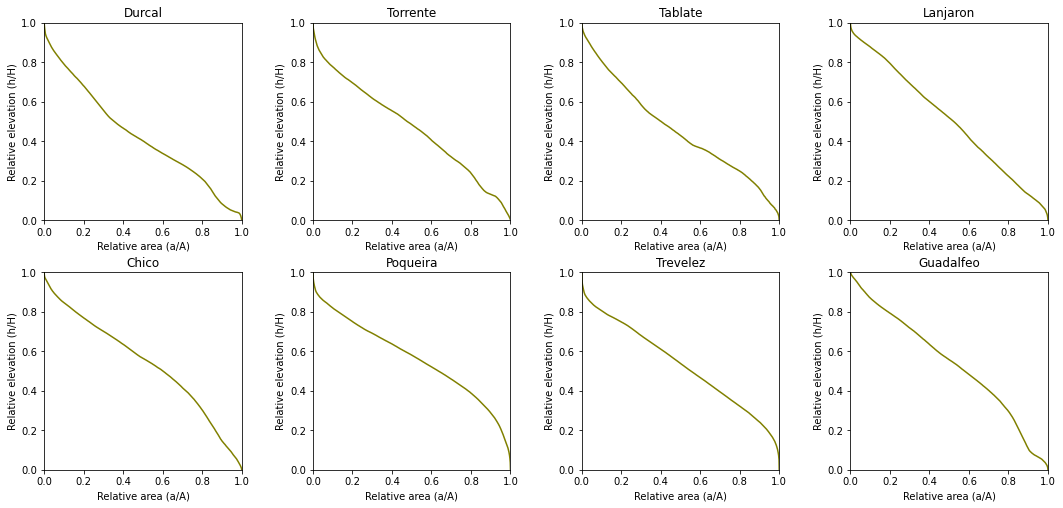

In [3]:
import matplotlib.pyplot as plt

# Create a figure to plot all the curves in a grid of Axes
fig = plt.figure(figsize=(15, 7))

# Iterate curves and plot in successive Axes
for n, curva in enumerate(curvas):
    # Create an Axe instance
    ax = fig.add_subplot(2, 4, n+1)
    # Plot curve in the Axe
    curva.plot(ax)
    # Set some properties for the plot
    ax.set_aspect("equal")
    ax.set_xlim((0, 1))
    ax.set_ylim((0, 1))
    ax.set_title(curva.getName())
    ax.set_xlabel("Relative area (a/A)")
    ax.set_ylabel("Relative elevation (h/H)")
    
plt.tight_layout(pad=0.5)

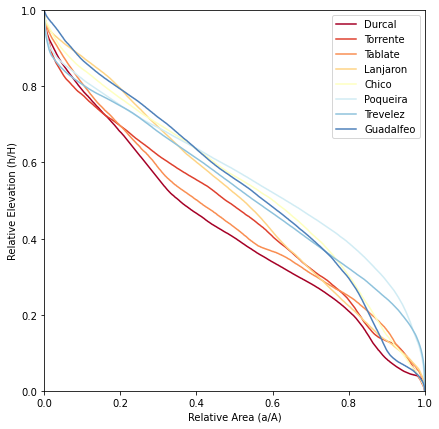

In [5]:
# Create a figure and an Axe to plot all the curves in the same graphic
cmap = plt.get_cmap('RdYlBu')
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for n, curva in enumerate(curvas):
    aa = curva.getA()
    hh = curva.getH()
    ax.plot(aa, hh, color=cmap(n/8), label = curva.getName())
    ax.set_aspect("equal")
    ax.set_xlim((0, 1))
    ax.set_ylim((0, 1))
    ax.set_xlabel("Relative Area (a/A)")
    ax.set_ylabel("Relative Elevation (h/H)")

ax.legend()
